In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError

# MNIST

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()

In [4]:
print("Number of classes:", len(np.unique(y_train_full)))

Number of classes: 10


In [5]:
print("Dimensions of the images =", x_train_full[0].shape)

Dimensions of the images = (28, 28)


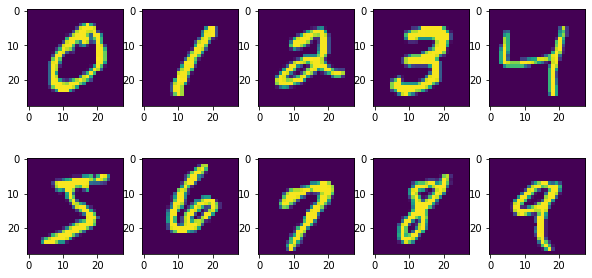

In [6]:
unique = np.unique(y_test_full)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in unique:

  idx = y_train_full.tolist().index(i)

  ax = axes[i//5, i%5]

  ax.imshow(x_train_full[idx])

## Normalization

In [7]:
x_train_full = x_train_full/255
x_test_full = x_test_full/255

## CNN with:
a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0

b) One Pooling layerwhich uses MAXPOOLINGwith stride =2.

c) One hidden layer having number of neurons = 100

In [8]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.Input(shape=(28,28,1)))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [9]:
import datetime
start = datetime.datetime.now()

model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size=32
epochs=5

history1 = model1.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

end = datetime.datetime.now()
print("Total time taken:", end-start)

Epoch 1/5
1688/1688 [==============================] - 36s 21ms/step - loss: 0.1479 - accuracy: 0.9551 - val_loss: 0.0613 - val_accuracy: 0.9828
Epoch 2/5
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0508 - accuracy: 0.9838 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 3/5
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 4/5
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0486 - val_accuracy: 0.9872
Epoch 5/5
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0418 - val_accuracy: 0.9897
Total time taken: 0:03:22.554125


In [10]:
model1.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 2s 7ms/step - loss: 0.0444 - accuracy: 0.9864


[0.04437990114092827, 0.9864000082015991]

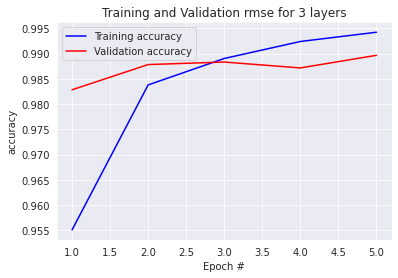

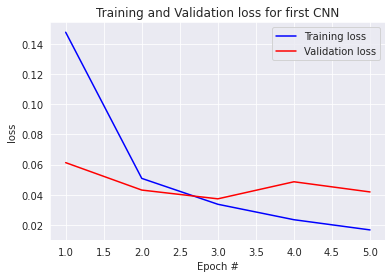

In [15]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history1.history['accuracy']
val_rmse = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for first CNN')
plt.legend()

plt.show()

## CNN with:
a) Two back-to-back Convolution layerswhich uses 32 kernels each of size 3x3, stride = 1 and, padding =0

b) One Pooling layerwhich uses MAXPOOLINGwith stride =2.

c) One hidden layer having number of neurons = 100

In [16]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=(28,28,1)))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation="relu"))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               460900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [18]:
start = datetime.datetime.now()

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size=32
epochs=5

history2 = model2.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

end = datetime.datetime.now()
print("Total time taken:", end-start)

Epoch 1/5
1688/1688 [==============================] - 109s 64ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0440 - val_accuracy: 0.9867
Epoch 2/5
1688/1688 [==============================] - 111s 66ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0413 - val_accuracy: 0.9880
Epoch 3/5
1688/1688 [==============================] - 102s 60ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0338 - val_accuracy: 0.9908
Epoch 4/5
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0420 - val_accuracy: 0.9905
Epoch 5/5
1688/1688 [==============================] - 101s 60ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0376 - val_accuracy: 0.9920
Total time taken: 0:09:22.538717


In [19]:
model2.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 5s 15ms/step - loss: 0.0426 - accuracy: 0.9890


[0.04263374209403992, 0.9890000224113464]

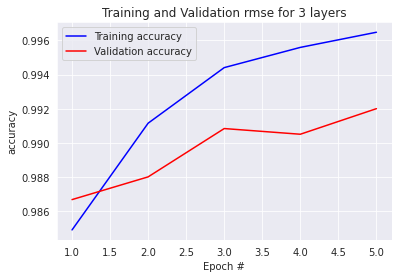

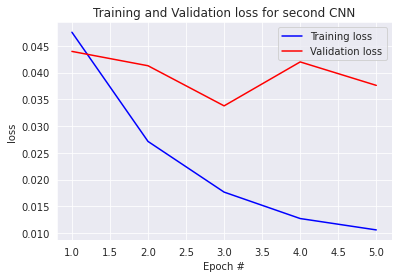

In [33]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history2.history['accuracy']
val_rmse = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for second CNN')
plt.legend()

plt.show()

## LeNet-5 architecture
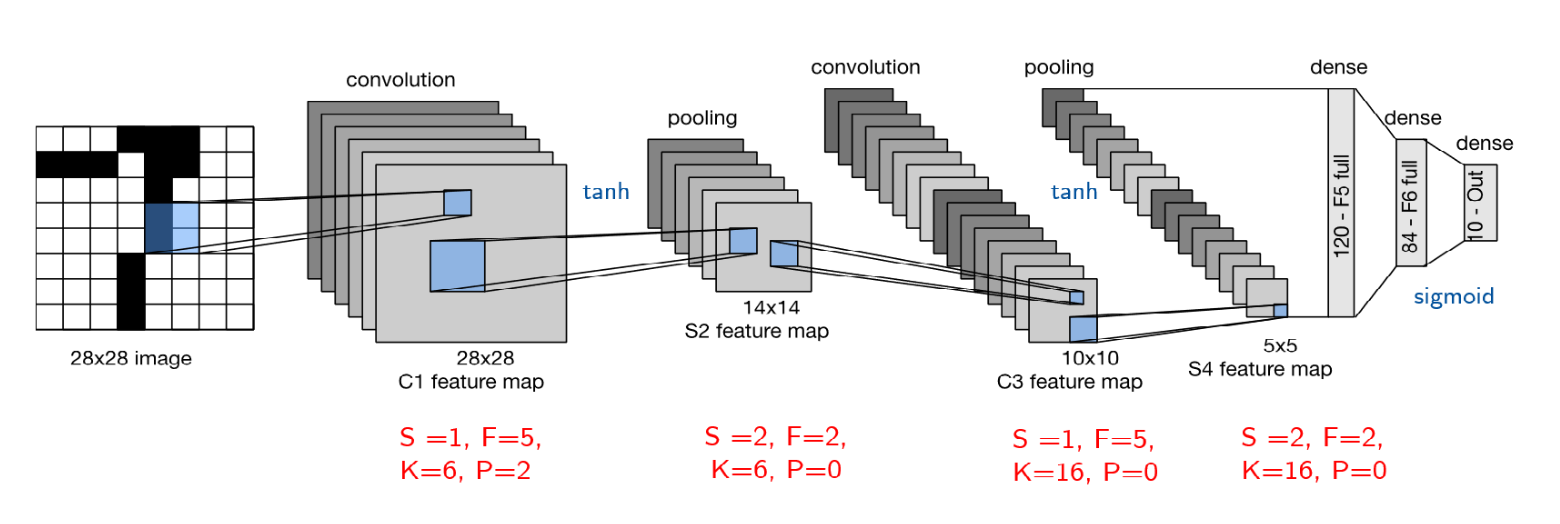

In [21]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.Input(shape=(28,28,1)))
model3.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation="tanh", padding="same"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation="tanh", padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(120, activation="sigmoid"))
model3.add(tf.keras.layers.Dense(84, activation="sigmoid"))
model3.add(tf.keras.layers.Dense(10, activation="softmax"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [22]:
start = datetime.datetime.now()

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size=32
epochs=5

history3 = model3.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

end = datetime.datetime.now()
print("Total time taken:", end-start)

Epoch 1/5
1688/1688 [==============================] - 44s 26ms/step - loss: 0.3246 - accuracy: 0.9163 - val_loss: 0.0745 - val_accuracy: 0.9790
Epoch 2/5
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0682 - accuracy: 0.9801 - val_loss: 0.0495 - val_accuracy: 0.9843
Epoch 3/5
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.0539 - val_accuracy: 0.9847
Epoch 4/5
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 5/5
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0425 - val_accuracy: 0.9873
Total time taken: 0:04:22.605716


In [23]:
model3.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 4s 12ms/step - loss: 0.0363 - accuracy: 0.9883


[0.036327868700027466, 0.9883000254631042]

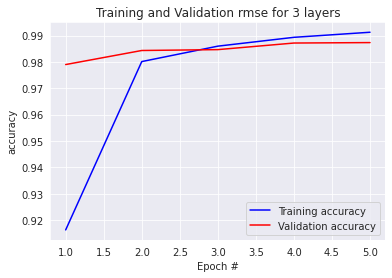

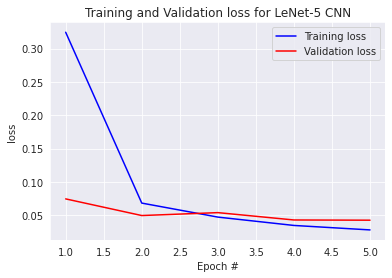

In [48]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history3.history['accuracy']
val_rmse = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for LeNet-5 CNN')
plt.legend()

plt.show()

# CIFAR-10

In [25]:
cifar10 = tf.keras.datasets.cifar10

In [26]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

In [27]:
print("Number of classes:", len(np.unique(y_train_full)))

Number of classes: 10


In [28]:
print("Dimensions of the images =", x_train_full[0].shape)

Dimensions of the images = (32, 32, 3)


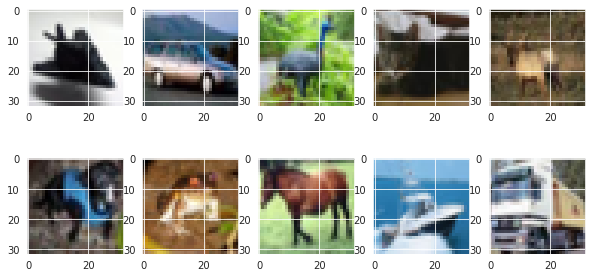

In [29]:
unique = np.unique(y_test_full)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in unique:

  idx = y_train_full.tolist().index(i)

  ax = axes[i//5, i%5]

  ax.imshow(x_train_full[idx])

## Normalization

In [30]:
x_train_full = x_train_full/255
x_test_full = x_test_full/255

## CNN with:
a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0

b) One Pooling layerwhich uses MAXPOOLINGwith stride =2.

c) One hidden layer having number of neurons = 100

In [31]:
model4 = tf.keras.Sequential()

model4.add(tf.keras.Input(shape=(32,32,3)))
model4.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(100, activation="relu"))
model4.add(tf.keras.layers.Dense(10, activation="softmax"))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               627300    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [35]:
start = datetime.datetime.now()

model4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size=32
epochs=5

history4 = model4.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

end = datetime.datetime.now()
print("Total time taken:", end-start)

Epoch 1/5
1407/1407 [==============================] - 47s 33ms/step - loss: 1.4034 - accuracy: 0.5006 - val_loss: 1.2326 - val_accuracy: 0.5690
Epoch 2/5
1407/1407 [==============================] - 45s 32ms/step - loss: 1.1794 - accuracy: 0.5836 - val_loss: 1.1888 - val_accuracy: 0.5876
Epoch 3/5
1407/1407 [==============================] - 45s 32ms/step - loss: 1.0543 - accuracy: 0.6314 - val_loss: 1.1755 - val_accuracy: 0.5900
Epoch 4/5
1407/1407 [==============================] - 45s 32ms/step - loss: 0.9740 - accuracy: 0.6588 - val_loss: 1.1280 - val_accuracy: 0.6106
Epoch 5/5
1407/1407 [==============================] - 45s 32ms/step - loss: 0.9094 - accuracy: 0.6827 - val_loss: 1.0490 - val_accuracy: 0.6424
Total time taken: 0:04:22.916561


In [36]:
model4.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 3s 10ms/step - loss: 1.0888 - accuracy: 0.6285


[1.088796615600586, 0.6284999847412109]

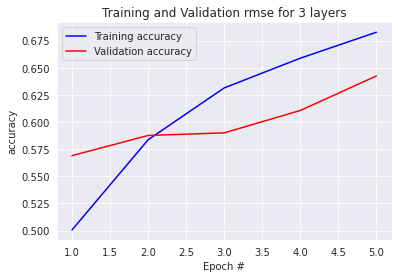

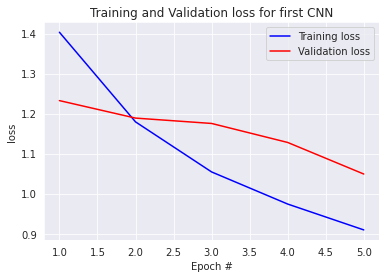

In [37]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history4.history['accuracy']
val_rmse = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for first CNN')
plt.legend()

plt.show()

## CNN with:
a) Two back-to-back Convolution layerswhich uses 32 kernels each of size 3x3, stride = 1 and, padding =0

b) One Pooling layerwhich uses MAXPOOLING with stride =2.

c) One hidden layer having number of neurons = 100

In [38]:
model5 = tf.keras.Sequential()

model5.add(tf.keras.Input(shape=(32,32,3)))
model5.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model5.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(100, activation="relu"))
model5.add(tf.keras.layers.Dense(10, activation="softmax"))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 100)               627300    
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                      

In [39]:
start = datetime.datetime.now()

model5.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size=32
epochs=5

history5 = model5.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

end = datetime.datetime.now()
print("Total time taken:", end-start)

Epoch 1/5
1407/1407 [==============================] - 113s 80ms/step - loss: 1.4500 - accuracy: 0.4823 - val_loss: 1.1792 - val_accuracy: 0.5916
Epoch 2/5
1407/1407 [==============================] - 112s 79ms/step - loss: 1.0815 - accuracy: 0.6190 - val_loss: 1.0606 - val_accuracy: 0.6386
Epoch 3/5
1407/1407 [==============================] - 111s 79ms/step - loss: 0.9101 - accuracy: 0.6814 - val_loss: 0.9575 - val_accuracy: 0.6780
Epoch 4/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.7986 - accuracy: 0.7206 - val_loss: 0.9419 - val_accuracy: 0.6766
Epoch 5/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.6985 - accuracy: 0.7548 - val_loss: 1.0116 - val_accuracy: 0.6720
Total time taken: 0:09:23.270763


In [40]:
model5.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 6s 19ms/step - loss: 1.0472 - accuracy: 0.6566


[1.0471998453140259, 0.6565999984741211]

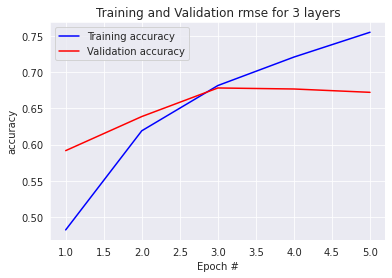

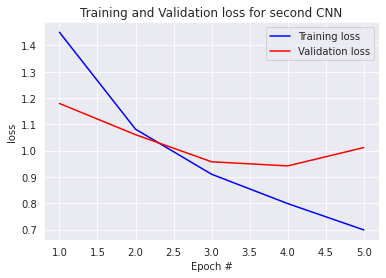

In [46]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history5.history['accuracy']
val_rmse = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for second CNN')
plt.legend()

plt.show()

## LeNet-5 Architecture
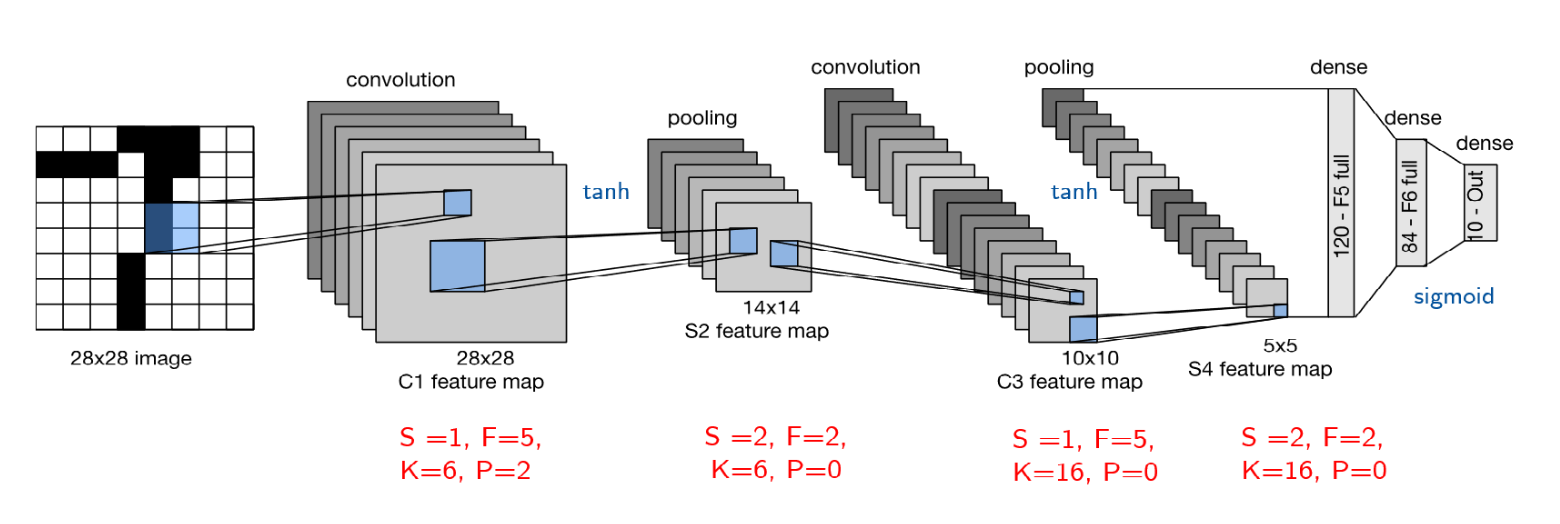

In [42]:
model6 = tf.keras.Sequential()

model6.add(tf.keras.Input(shape=(32,32,3)))
model6.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation="tanh", padding="same"))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model6.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation="tanh", padding="valid"))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(120, activation="sigmoid"))
model6.add(tf.keras.layers.Dense(84, activation="sigmoid"))
model6.add(tf.keras.layers.Dense(10, activation="softmax"))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_11 (Dense)            (None, 120)              

In [43]:
start = datetime.datetime.now()

model6.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size=32
epochs=5

history6 = model6.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

end = datetime.datetime.now()
print("Total time taken:", end-start)

Epoch 1/5
1407/1407 [==============================] - 61s 43ms/step - loss: 1.6714 - accuracy: 0.3902 - val_loss: 1.4615 - val_accuracy: 0.4664
Epoch 2/5
1407/1407 [==============================] - 57s 40ms/step - loss: 1.3779 - accuracy: 0.5014 - val_loss: 1.2923 - val_accuracy: 0.5374
Epoch 3/5
1407/1407 [==============================] - 57s 40ms/step - loss: 1.2572 - accuracy: 0.5465 - val_loss: 1.2118 - val_accuracy: 0.5688
Epoch 4/5
1407/1407 [==============================] - 57s 40ms/step - loss: 1.1608 - accuracy: 0.5867 - val_loss: 1.1595 - val_accuracy: 0.5870
Epoch 5/5
1407/1407 [==============================] - 57s 40ms/step - loss: 1.0835 - accuracy: 0.6130 - val_loss: 1.1094 - val_accuracy: 0.6016
Total time taken: 0:04:49.418251


In [44]:
model6.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 6s 20ms/step - loss: 1.1598 - accuracy: 0.5881


[1.1598044633865356, 0.588100016117096]

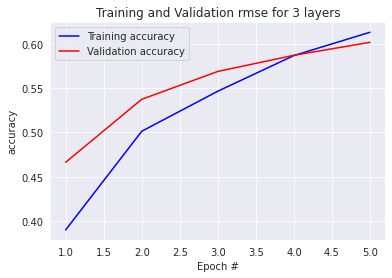

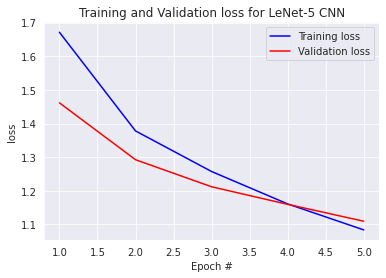

In [47]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history6.history['accuracy']
val_rmse = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for LeNet-5 CNN')
plt.legend()

plt.show()